In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import binom, beta, uniform, gamma, poisson,nbinom

In [5]:
size=1000
nA=10
nB=13
yA=np.array([12,9,12,14,13,13,15,8,15,6])
yB=np.array([11,11,10,9,9,8,7,10,6,8,8,9,7])
w=10

In [6]:
thetaA_yA = gamma.rvs(a=120+sum(yA), scale=1/(10+len(yA)), size=size)
# YtA = nbinom.rvs(n=120+sum(yA),p=(10+len(yA))/(10+len(yA)+1), size=size)
YtA = poisson.rvs(thetaA_yA, size=size)

thetaB_yB = gamma.rvs(a=12+sum(yB), scale=1/(1+len(yB)), size=size)
# YtA = nbinom.rvs(n=120+sum(yA),p=(10+len(yA))/(10+len(yA)+1), size=size)
YtB = poisson.rvs(thetaB_yB, size=size)

In [11]:
t = np.zeros((2, size-w))
for s in range(size-w):
    t[0, s] = np.mean(YtA[s:s+w])/np.std(YtA[s:s+w])
    t[1, s] = np.mean(YtB[s:s+w])/np.std(YtB[s:s+w])
t_obs_A = np.mean(yA)/np.std(yA)
t_obs_B = np.mean(yB)/np.std(yB)

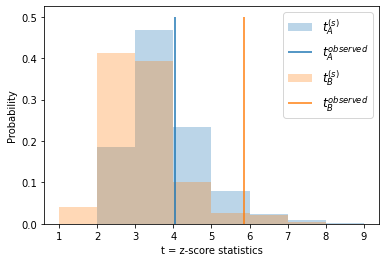

In [26]:
plt.figure(figsize = (6,4))
# plt.suptitle('Probability of sum(Y)=57 given theta')
plt.hist(t[0],bins = np.arange(1,10), density=True, alpha=0.3, label = '$t^{(s)}_A$')
plt.vlines(t_obs_A, 0, 0.5, color='C0', label = '$t_{A}^{observed}$')
plt.hist(t[1], bins = np.arange(1,10), density=True, alpha=0.3, label = '$t^{(s)}_B$')
plt.vlines(t_obs_B, 0, 0.5, color='C1', label = '$t_{B}^{observed}$')
# plt.plot(x, beta.pdf(x, a=sumY+1, b=n-sumY+1), color='C0')
# plt.plot(x, beta.pdf(x, a=sumY2+1, b=n2-sumY2+1), color = 'C1')

plt.xlabel('t = z-score statistics')
plt.ylabel('Probability')
plt.legend(fontsize = 12)
plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex3_4_Fig1.png')

In [22]:
max(t[0])

8.294117647058822